## Analisa distribusi gigitan bullfrog dewasa dan remaja

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [59]:
#cleaning data
frog = pd.read_csv('frog_tongue.csv', sep=',', skiprows=14)

In [60]:
frog.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


In [65]:
frog['date'] = frog['date'].str.replace('_','-')
pd.to_datetime(frog['date'])


0    2013-02-26
1    2013-02-26
2    2013-03-01
3    2013-03-01
4    2013-03-01
5    2013-03-01
6    2013-03-05
7    2013-03-05
8    2013-03-05
9    2013-03-05
10   2013-03-12
11   2013-03-12
12   2013-03-12
13   2013-03-12
14   2013-03-12
15   2013-03-15
16   2013-03-15
17   2013-03-15
18   2013-03-15
19   2013-03-15
20   2013-03-19
21   2013-03-19
22   2013-03-19
23   2013-03-19
24   2013-03-21
25   2013-03-21
26   2013-03-21
27   2013-03-21
28   2013-03-25
29   2013-03-25
        ...    
50   2013-06-18
51   2013-06-18
52   2013-06-21
53   2013-06-21
54   2013-06-21
55   2013-06-21
56   2013-06-26
57   2013-06-26
58   2013-06-26
59   2013-06-26
60   2013-05-27
61   2013-05-27
62   2013-05-27
63   2013-05-30
64   2013-05-30
65   2013-05-30
66   2013-06-03
67   2013-06-11
68   2013-06-11
69   2013-06-11
70   2013-06-11
71   2013-06-14
72   2013-06-18
73   2013-06-18
74   2013-06-18
75   2013-06-18
76   2013-06-21
77   2013-06-21
78   2013-06-21
79   2013-06-21
Name: date, Length: 80, 

In [66]:
frog.set_index('date', inplace=True)

In [69]:
frog.ID.value_counts()

I      20
IV     20
III    20
II     20
Name: ID, dtype: int64

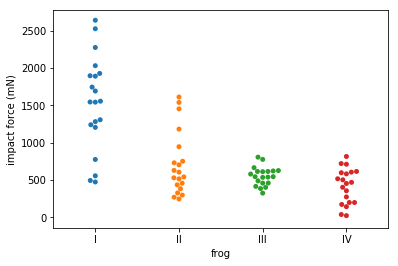

In [75]:
# Make bee swarm plot
_ = sns.swarmplot('ID','impact force (mN)', data=frog)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (mN)')

# Show the plot
plt.show()


In [78]:
frog.groupby('ID')['impact force (mN)'].mean()

ID
I      1530.20
II      707.35
III     550.10
IV      419.10
Name: impact force (mN), dtype: float64

In [86]:
# kita hanya kan ambil data katak dewasa dan remaja pada ukuran yang sama yaitu kategori II dan IV
frog_a = frog[frog.ID=='II']['impact force (mN)']
frog_b = frog[frog.ID=='IV']['impact force (mN)']

## Analisa pemeriksaan distribusi gigitan dari frog_a dan frog_b
akan digunakan permutasi untuk melihat p-value dari data yang ada 
dengan asumsi data frog_a dan frog_b memiliki distribusi yang serupa

In [91]:
def permutation_sample(data1, data2):
    """fungsi untuk membuat sample permutasi"""

    # penggabungan dua data
    data = np.concatenate((data1, data2))

    # melakukan permutasi
    permuted_data = np.random.permutation(data)

    # kita ambil data pertama dan kedua
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """fungsi ini digunakan untuk melakukan permutasi ganda"""

    # inisialisasi data awal
    perm_replicates = np.empty(size)

    for i in range(size):
        # membuat data permutasi
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # lihat data statistic asli
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates


def diff_of_means(data_1, data_2):
    """melihat perbandingan mean dari 2 data"""

    
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# menghitung perbedaan mean dari hasil experimen
empirical_diff_means = diff_of_means(frog_a,frog_b)

# malakukan permutasi untuk 10000 kali percobaan
perm_replicates = draw_perm_reps(frog_a, frog_b,
                                 diff_of_means, size=10000)

# melihat p_value
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0058


nilai ini menunjukkan bahwa ada kemungkinan perbedaan mean sekitar 0.58% pada katak yang sama